In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:

df=  pd.read_csv('/kaggle/input/titanic-dataset/Titanic-Dataset.csv')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
def gini(samples):
    sum_samples = sum(samples)
    score=0
    probas=[]
    for sample in samples:
        proba= sample/sum_samples
        probas.append(proba)
    for proba in probas:
        score += proba*(1-proba)
    return score

In [ ]:
def entropy(samples):
    sum_samples = sum(samples)
    score=0
    probas=[]
    for sample in samples:
        proba= sample/sum_samples
        probas.append(proba)
    for proba in probas:
        score += proba*np.log(proba)
    return -1*score

In [ ]:
samples= [100,25,0]
entropy(samples)

/tmp/ipykernel_27/104340150.py:9: RuntimeWarning: divide by zero encountered in log
  score += proba*np.log(proba)
/tmp/ipykernel_27/104340150.py:9: RuntimeWarning: invalid value encountered in scalar multiply
  score += proba*np.log(proba)


nan

In [ ]:
sex_mapping= {
    'female':0,
    'male':1
}
df.Sex= df.Sex.map(sex_mapping)

In [ ]:
df.Pclass.nunique()
features= ['Sex','Pclass']
model= DecisionTreeClassifier()

In [ ]:
model.fit(df[features],df.Survived)

DecisionTreeClassifier()

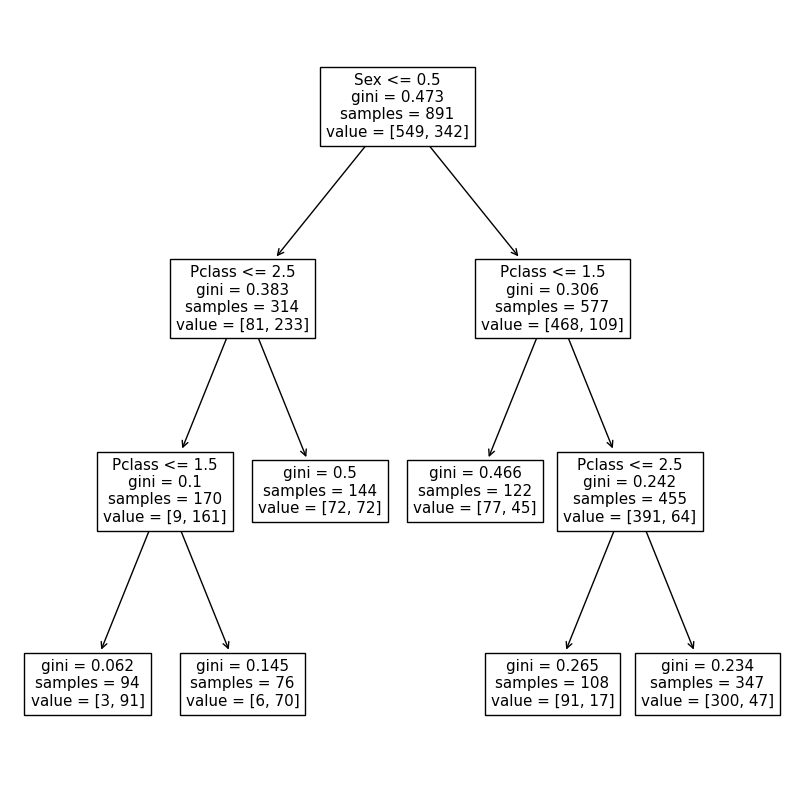

In [ ]:
plt.figure(figsize= (10,10))
plot_tree(model,feature_names=features)
plt.show()